In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

classes = test_data.classes

print(training_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [7]:
batch_size = 1

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}\n")
    print(X)
    print(y)
    print(y[0].item())
    break


Shape of X [N, C, H, W]: torch.Size([1, 1, 28, 28])
Shape of y: torch.Size([1]) torch.int64

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000

7 - seven


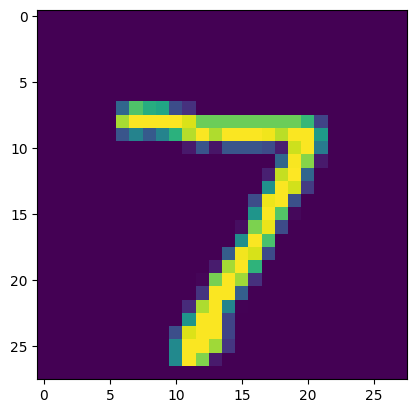

In [8]:
label = classes[y[0].item()]
print(label)
imgplot = plt.imshow(X[0][0])

In [9]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
    

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [10]:
# Get cpu, gpu or mps device for training.

device = ("cuda" if torch.cuda.is_available() 
                 else "mps" if torch.backends.mps.is_available() 
                            else "cpu")

print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:

for name, param in model.named_parameters():
    if param.requires_grad:
        if "linear_relu_stack.4." in name:
            print(name, param.data)

linear_relu_stack.4.weight tensor([[ 0.0255,  0.0243, -0.0242,  ...,  0.0084, -0.0252,  0.0223],
        [-0.0251, -0.0298, -0.0338,  ...,  0.0338,  0.0137,  0.0024],
        [ 0.0219,  0.0304,  0.0342,  ...,  0.0271, -0.0039,  0.0304],
        ...,
        [-0.0357,  0.0069,  0.0375,  ...,  0.0401, -0.0361, -0.0313],
        [-0.0124, -0.0362, -0.0394,  ...,  0.0131,  0.0391, -0.0023],
        [ 0.0338,  0.0085,  0.0368,  ...,  0.0059, -0.0169,  0.0086]])
linear_relu_stack.4.bias tensor([ 0.0311,  0.0343,  0.0112,  0.0318,  0.0183,  0.0223, -0.0407, -0.0413,
        -0.0005,  0.0245])


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    losses, accuracies = [],[]
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        optimizer.zero_grad()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        # Nudge
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            accuracy = (torch.sum((torch.argmax(pred, dim=1) == y).type(torch.float))/len(y)).item()
            losses.append(loss)
            accuracies.append(accuracy)
    return losses, accuracies

In [14]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [15]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

epochs = 5
train_losses, train_accuracies = [], []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    losses, accuracies = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.extend(losses)
    train_accuracies.extend(accuracies)
    test(test_dataloader, model, loss_fn)
print("Done!")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Epoch 1
-------------------------------
loss: 2.305172  [   64/60000]
loss: 2.288159  [ 6464/60000]
loss: 2.292326  [12864/60000]
loss: 2.291423  [19264/60000]
loss: 2.289953  [25664/60000]
loss: 2.276921  [32064/60000]
loss: 2.270233  [38464/60000]
loss: 2.280453  [44864/60000]
loss: 2.265040  [51264/60000]
loss: 2.261686  [57664/60000]
Test Error: 
 Accuracy: 43.0%, Avg loss: 2.257806 

Epoch 2
-------------------------------
loss: 2.260578  [   64/60000]
loss: 2.240587  [ 6464/60000]
loss: 2.254778  [12864/60000]
loss: 2.231698  [19264/60000]
loss: 2.243095  [25664/60000]
loss: 2.229370  [32064/60000]
loss: 2.211585  [38464/60000]
loss: 2.239424  [44864/60000]
loss: 2.206505  [51264/60000]
loss: 2.197760  [57664/60000]
Test Error: 
 Accuracy: 56.9%, Avg loss: 2.195256 

Epoch 3
-------------------------------
loss: 2.198280  [   64/60000]
loss: 2.170527  [ 6464/60000]
loss: 2.198286  [12864

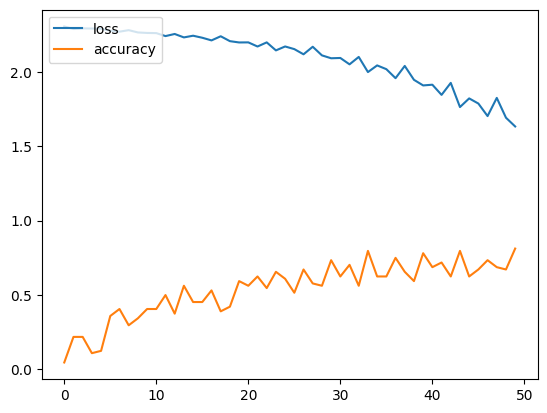

In [16]:
plt.plot(train_losses, label = "loss")
plt.plot(train_accuracies, label = "accuracy")
plt.legend(loc="upper left")

plt.show()

In [17]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [18]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [19]:
X, y = test_data[0]
print(X.shape)
print(y)
test_data.classes[y]
len(test_data)

torch.Size([1, 28, 28])
7


10000

In [20]:
torch.randint(len(test_data),()).item()

580

Predicted: 7 - seven Actual: 7 - seven


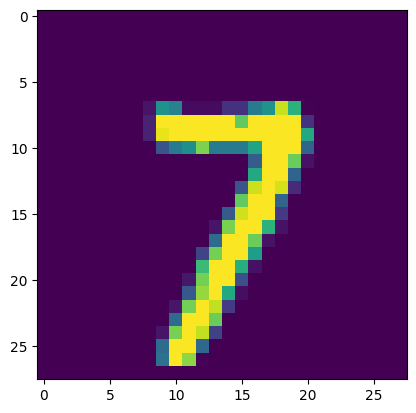

In [21]:
index = torch.randint(len(test_data),()).item()

X, y = test_data[index]
imgplot = plt.imshow(torch.squeeze(X))

model.eval()
with torch.no_grad():
    X = X.to(device)
    pred = model(X)

class_index = torch.squeeze(torch.argmax(pred, dim=1)).item()

test_data.classes[class_index]
print(f"Predicted: {test_data.classes[class_index]} Actual: {test_data.classes[y]}")

In [18]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    model.eval()
    with torch.no_grad():
        X = X.to(device)
        pred = model(X)
    break

pred.shape
(torch.sum((torch.argmax(pred, dim=1) == y).type(torch.float))/len(y)).item()

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


0.609375

In [19]:
y

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

In [20]:
pred

tensor([[-2.1533, -2.3743, -1.1461, -1.4110, -1.0082,  2.4110, -1.0309,  2.6471,
          1.6351,  3.0332],
        [ 0.8966, -3.4640,  3.8207, -1.1034,  3.3860, -1.9307,  2.8970, -3.5350,
          1.6250, -2.3286],
        [ 2.0939,  4.9700, -0.4718,  3.5316,  0.5507, -2.5586,  0.6511, -3.2166,
         -2.5394, -2.9965],
        [ 1.4611,  3.9662, -0.5475,  2.7792,  0.2307, -1.8047,  0.3246, -2.2987,
         -2.0599, -2.1372],
        [ 1.0843, -1.3007,  1.5365, -0.0598,  1.4371, -1.1456,  1.5181, -2.1510,
          0.5132, -1.4263],
        [ 2.2101,  3.2550,  0.1799,  2.6133,  0.8936, -2.3546,  1.0212, -3.1402,
         -1.8566, -2.7869],
        [ 0.8440, -0.5879,  0.9621, -0.0202,  1.0752, -0.7863,  0.9785, -1.3361,
          0.1532, -1.2642],
        [ 0.4572, -1.2523,  1.6189, -0.2869,  1.7436, -0.9699,  1.3593, -1.8337,
          0.4735, -1.2723],
        [-0.4812, -0.4935, -0.3668, -0.3233, -0.2883,  0.6510, -0.1704,  0.9279,
          0.3344,  0.2124],
        [-1.4759, -

In [33]:
p = torch.rand((2,10))
print(p)
torch.argmax(p)

tensor([[0.4528, 0.8386, 0.2485, 0.2659, 0.4368, 0.8538, 0.3801, 0.9685, 0.3669,
         0.5245],
        [0.8788, 0.0019, 0.6686, 0.2322, 0.0193, 0.7265, 0.4546, 0.6904, 0.5858,
         0.5711]])


tensor(7)

In [39]:
torch.sum((torch.argmax(p, dim=1) == torch.tensor([7,1])).type(torch.float)) / len(p)

tensor(0.5000)

In [22]:
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 2.555MB
